<a href="https://colab.research.google.com/github/Suleymanabdy/Data-Science-Checkpoints./blob/main/Deep_Neural_Network_Checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fbce118ac1364fdce060b39e80c7b0c48ac8264f3ea75b39fc520504f58bd24d
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/bank.csv")

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title= "Ydata_Profiling")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Explore the dataset
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [ ]:
print(df.describe())


                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [ ]:
print(df.shape)

(11162, 17)


In [ ]:
#Check for missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [ ]:

print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [ ]:
#Check data types
print(df.dtypes)


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [ ]:
#Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include='object').columns

In [ ]:
df[non_numeric_cols] = df[non_numeric_cols].replace('[^0-9.]', np.nan, regex=True)


<ipython-input-18-e0ea656bf75c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[non_numeric_cols] = df[non_numeric_cols].replace('[^0-9.]', np.nan, regex=True)


In [ ]:
#Convert non-numeric columns to numeric using pd.to_numeric
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#Calculate quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [ ]:
#Print the results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: age           32.0
job            NaN
marital        NaN
education      NaN
default        NaN
balance      122.0
housing        NaN
loan           NaN
contact        NaN
day            8.0
month          NaN
duration     138.0
campaign       1.0
pdays         -1.0
previous       0.0
poutcome       NaN
deposit        NaN
Name: 0.25, dtype: float64
Q3: age            49.00
job              NaN
marital          NaN
education        NaN
default          NaN
balance      1708.00
housing          NaN
loan             NaN
contact          NaN
day            22.00
month            NaN
duration      496.00
campaign        3.00
pdays          20.75
previous        1.00
poutcome         NaN
deposit          NaN
Name: 0.75, dtype: float64
IQR: age            17.00
job              NaN
marital          NaN
education        NaN
default          NaN
balance      1586.00
housing          NaN
loan             NaN
contact          NaN
day            14.00
month            NaN
duration      358.00
c

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))


In [ ]:
#Calculate the correlation matrix
corr = df .corr()


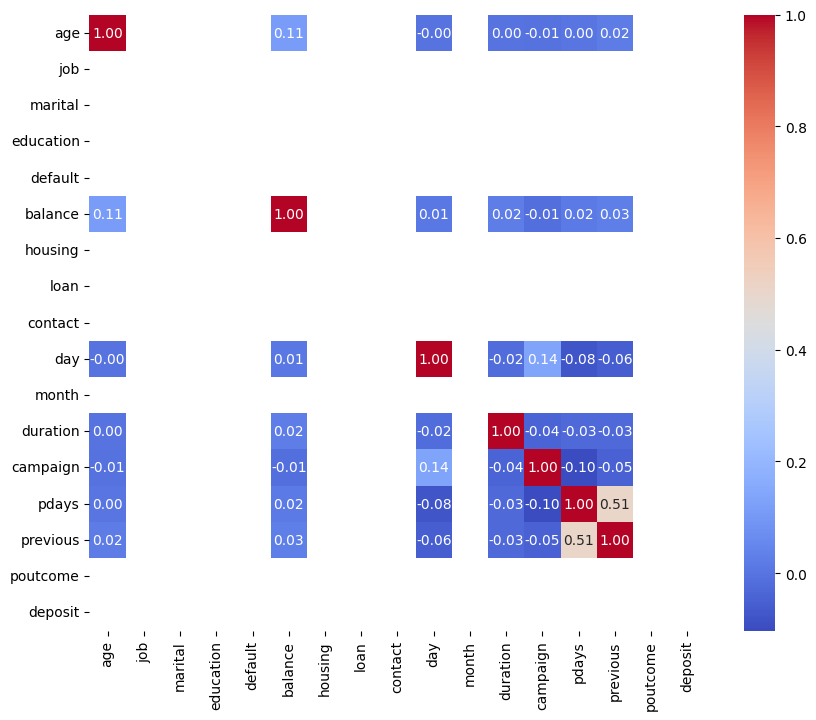

In [ ]:
#Create a headmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [ ]:
#Split the data into features (X) and target variable (y)
X = df [['duration', 'pdays', 'previous', 'balance', 'education']]
y = df['deposit']

In [ ]:
#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9223 - loss: 5.3947 - val_accuracy: 1.0000 - val_loss: 1.9752e-04
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.3902e-05 - val_accuracy: 1.0000 - val_loss: 1.9091e-04
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5885e-05 - val_accuracy: 1.0000 - val_loss: 1.8425e-04
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5149e-04 - val_accuracy: 1.0000 - val_loss: 1.7480e-04
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.3878e-05 - val_accuracy: 1.0000 - val_loss: 1.6502e-04
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.7286e-05 - val_accuracy: 1.0000 - val_loss: 1.5664e-04
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5418e-05 - val_accuracy: 1.0000 - val_loss: 1.4555e-04
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.9169e-06
Test Accuracy: 1.0


In [ ]:
#Make predictions
predictions = model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
